In [1]:
import os
import numpy as np
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from GARDEN import GARDEN
import scanpy as sc
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/root/miniconda3/envs/STAR/lib/R"
print(device)
n_clusters = 12

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:1


In [2]:
# read data
adata = sc.read('8months-control-replicate_1_data.h5ad')
adata.var_names_make_unique()

In [3]:
adata

AnnData object with n_obs × n_vars = 8506 × 2766
    obs: 'ct_top', 'ct_sub', 'sample', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [ ]:
model = GARDEN.GARDEN(adata,k_dynamic=6,k_cl=7,model_select = 'KNN',device=device)
adata = model.train()

The graph contains 51036 edges, 8506 cells.
6.0000 neighbors per cell on average.
Graph_2 Construction
The graph contains 51036 edges, 8506 cells.
6.0000 neighbors per cell on average.
Begin to train ST data...


  0%|          | 0/800 [00:00<?, ?it/s]

Overall loss : tensor(7.9757, device='cuda:1', grad_fn=<AddBackward0>)


 13%|█▎        | 103/800 [00:09<00:58, 11.87it/s]

Overall loss : tensor(5.4012, device='cuda:1', grad_fn=<AddBackward0>)


 25%|██▌       | 203/800 [00:17<00:50, 11.79it/s]

Overall loss : tensor(4.5944, device='cuda:1', grad_fn=<AddBackward0>)


 38%|███▊      | 303/800 [00:26<00:42, 11.73it/s]

Overall loss : tensor(4.2027, device='cuda:1', grad_fn=<AddBackward0>)


 50%|█████     | 403/800 [00:35<00:33, 11.70it/s]

Overall loss : tensor(3.8728, device='cuda:1', grad_fn=<AddBackward0>)


 63%|██████▎   | 503/800 [00:43<00:25, 11.69it/s]

Overall loss : tensor(3.4503, device='cuda:1', grad_fn=<AddBackward0>)


 75%|███████▌  | 603/800 [00:52<00:16, 11.62it/s]

Overall loss : tensor(3.2430, device='cuda:1', grad_fn=<AddBackward0>)


 88%|████████▊ | 703/800 [01:01<00:08, 11.61it/s]

Overall loss : tensor(3.0515, device='cuda:1', grad_fn=<AddBackward0>)


100%|██████████| 800/800 [01:09<00:00, 11.45it/s]


Optimization finished for ST data!


In [5]:
radius = 30
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"
tool = 'mclust' # mclust, leiden, and louvain

# clustering
from GARDEN.utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=1.4, increment=0.01, refinement=False)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


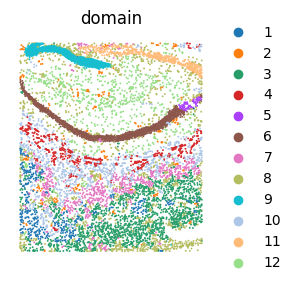

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 3)
sc.pl.spatial(adata,color = 'domain',frameon = False,colorbar_loc=None,spot_size=200)

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


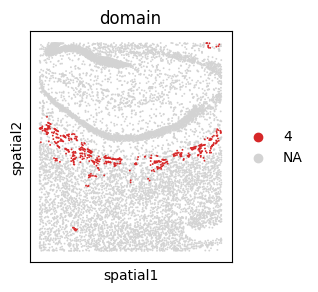

In [7]:
sc.pl.spatial(adata,color = 'domain',groups=[4],spot_size=200)